# Heart Rate Prediction Project
This notebook performs an analysis and prediction of heart rate using the Framingham dataset.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [13]:
# Load dataset
df = pd.read_csv("framingham.csv")
# Display first few rows
print("First 5 rows of dataset:")
print(df.head())


First 5 rows of dataset:
   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0        

In [14]:
# Checking for null values
print("\nMissing values:")
print(df.isnull().sum())



Missing values:
male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64


In [15]:
# Filling missing values with median
df.fillna(df.median(), inplace=True)


In [16]:
# Basic statistics and visualization
print("\nDataset Description:")
print(df.describe())



Dataset Description:
              male          age    education  currentSmoker   cigsPerDay  \
count  4240.000000  4240.000000  4240.000000    4240.000000  4240.000000   
mean      0.429245    49.580189     1.979953       0.494104     8.944340   
std       0.495027     8.572942     1.007087       0.500024    11.904777   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4240.000000      4240.000000   4240.000000  4240.000000  4240.000000   
mean      0.029245         0.005896      0.310613     0.025708   236.667689   
std       0.168513         0.076569      0.462799     0.

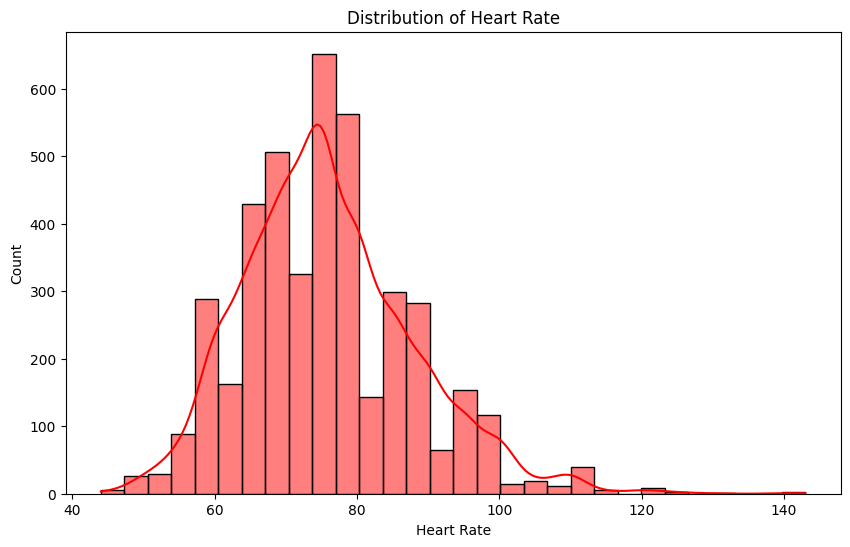

In [17]:
# Visualizations
plt.figure(figsize=(10,6))
sns.histplot(df['heartRate'], bins=30, kde=True, color='red')
plt.title('Distribution of Heart Rate')
plt.xlabel('Heart Rate')
plt.ylabel('Count')
plt.show()

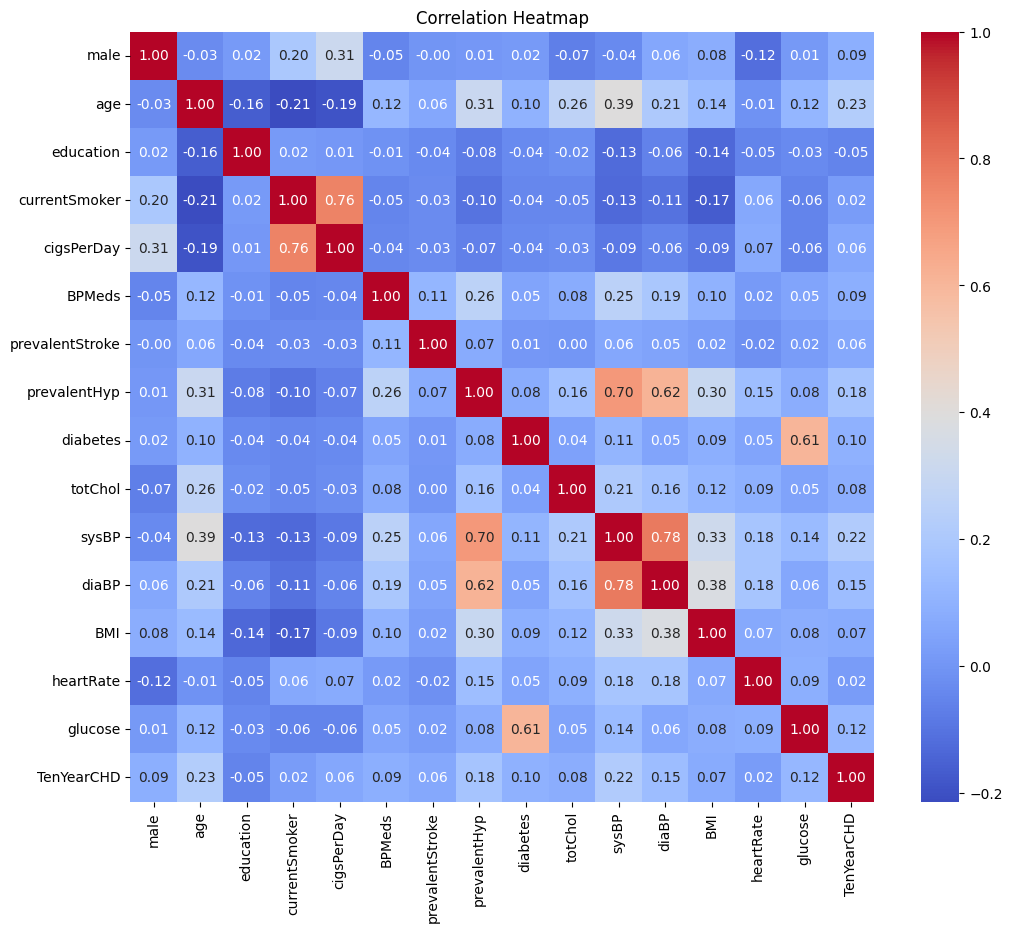

In [18]:
# Correlation heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()



In [19]:
# Define features and target
X = df.drop('TenYearCHD', axis=1)  # Features
y = df['TenYearCHD']               # Target


# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



# Logistic Regression model training
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


# Predictions
y_pred = model.predict(X_test_scaled)


In [20]:
# Evaluation metrics
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.2f}")



Confusion Matrix:
[[717   8]
 [115   8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       725
           1       0.50      0.07      0.12       123

    accuracy                           0.85       848
   macro avg       0.68      0.53      0.52       848
weighted avg       0.81      0.85      0.80       848


Accuracy Score: 0.85


## Conclusion
- We used the Framingham dataset to predict the risk of heart disease within ten years.
- After preprocessing and exploring the dataset, we used logistic regression for prediction.
- The model provides a reasonable accuracy, and the evaluation metrics show potential for use in early detection.
- Further tuning or trying more advanced models could improve performance.
